<a href="https://colab.research.google.com/github/Axel3D2Y/MACHINE-LEARNING-MODELS-USING-SCIKIT-LEARN/blob/main/Analisis%20para%20tarjetas%20de%20credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
data=pd.read_csv(path + "/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


# Analisis Exploratorio

In [ ]:
correlacion=data.corr()
correlacion.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


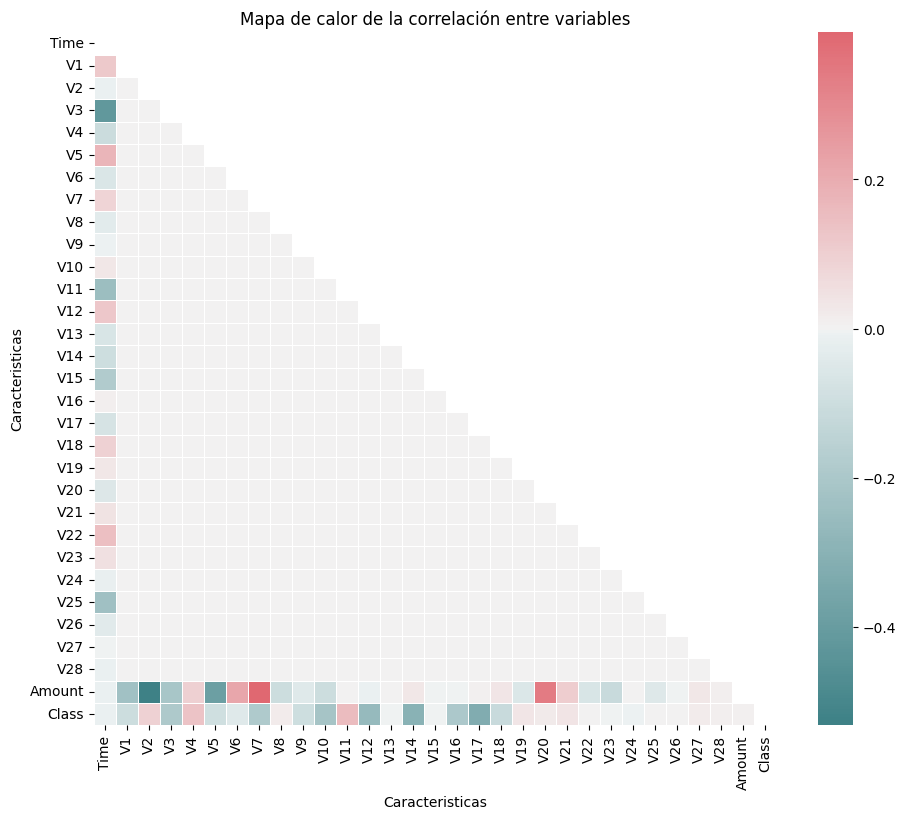

In [ ]:
mask= np.triu(np.ones_like(correlacion, dtype=bool))
fig, ax= plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(200, 10, as_cmap=True) #paleta de color
sns.heatmap(correlacion, mask=mask, center=0,annot=False, cmap=cmap, linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables')
plt.xlabel('Caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

**¿Cuáles son las características más importantes que influyen en la detección de fraude?**

In [ ]:
caracteristicas=correlacion['Class'].sort_values(ascending=False).head(6).drop('Class')
print(f'las caracteristicas mas importantes para la prediccion del fraude son \n{ caracteristicas}')

las caracteristicas mas importantes para la prediccion del fraude son 
V11    0.154876
V4     0.133447
V2     0.091289
V21    0.040413
V19    0.034783
Name: Class, dtype: float64


**¿Cómo se distribuyen las transacciones fraudulentas en comparación con las no fraudulentas?**

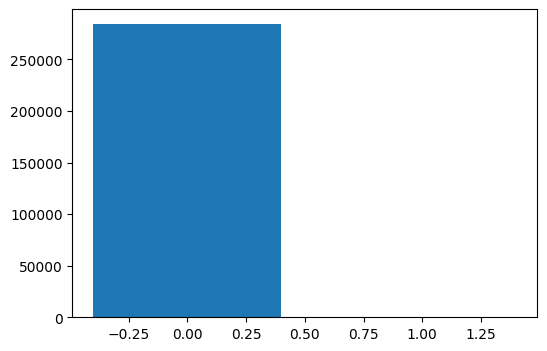

In [ ]:
data_Class=data['Class'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(data_Class.index, data_Class)
plt.show()

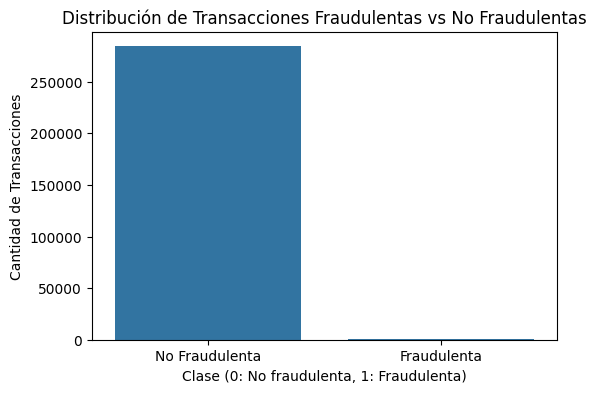

In [ ]:
fraud_counts = data['Class'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribución de Transacciones Fraudulentas vs No Fraudulentas')
plt.xlabel('Clase (0: No fraudulenta, 1: Fraudulenta)')
plt.ylabel('Cantidad de Transacciones')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.show()

**¿Existen relaciones o patrones entre el monto de la transacción y la probabilidad de que sea fraudulenta?**

<ipython-input-9-9003ee739f55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class',y='Amount', data=data, palette='Set3' )


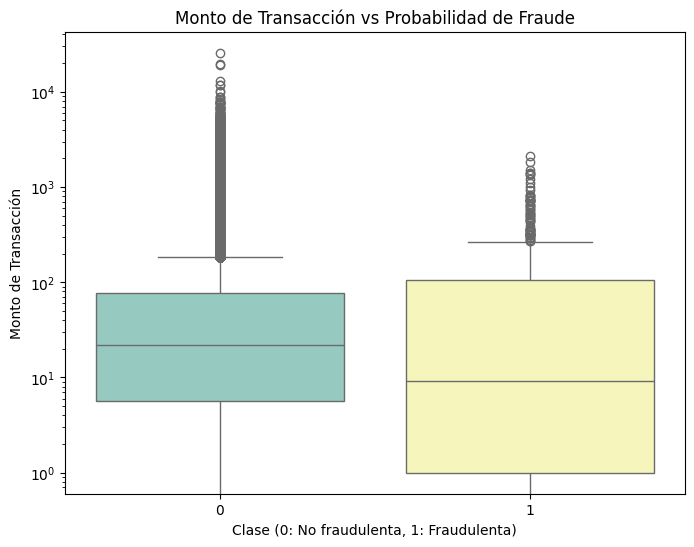

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class',y='Amount', data=data, palette='Set3' )
plt.title('Monto de Transacción vs Probabilidad de Fraude')
plt.xlabel('Clase (0: No fraudulenta, 1: Fraudulenta)')
plt.ylabel('Monto de Transacción')
plt.yscale('log')
plt.show()


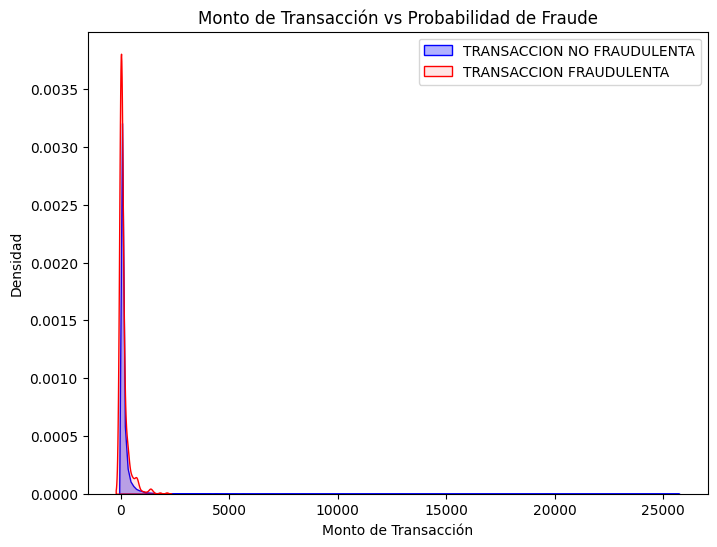

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data[data['Class']==0]['Amount'],fill = True, color = "blue", alpha = 0.3, label = "TRANSACCION NO FRAUDULENTA")
sns.kdeplot(data[data['Class']==1]['Amount'],fill = True, color = "red", alpha = 0.1, label = "TRANSACCION FRAUDULENTA")
plt.title('Monto de Transacción vs Probabilidad de Fraude')
plt.xlabel('Monto de Transacción')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Preparación de los datos para modelado:

**¿Cómo manejar el desbalanceo de clases en el conjunto de datos para evitar que el modelo esté sesgado hacia la clase mayoritaria?**



*   undersampling (muestrear menos de la clase mayoritaria)




In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop('Class', axis=1)
y=data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42,stratify=y)



sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("Distribución de clases después de SMOTE:", y_res.value_counts())

Distribución de clases después de SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


**Reducción de dimensionalidad**


1.  Análisis de Componentes Principales


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# scaler=StandardScaler()
# X_train_scaled = scaler.fit_transform(X_res)

# pca=PCA(n_components=0.95)
# X_train_pca=pca.fit_transform(X_train_scaled)
# print("Número de características después de PCA:", pca.n_components_)

**Escalado de los montos de las transacciones**



In [ ]:
scaler=StandardScaler()
X_res_scaled=scaler.fit_transform(X_res)
X_test_scaled=scaler.transform(X_test)


In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_res_scaled, y_res, test_size=0.15 , random_state=42,stratify=y_res)



print(f"Distribución de la clase final:  {y_train_final.value_counts()}")
print(f"Distribución de la clase test:  {y_test.value_counts()}")
print(f"Distribución de la clase validacion:  {y_val.value_counts()}")

Distribución de la clase final:  Class
0    169167
1    169167
Name: count, dtype: int64
Distribución de la clase test:  Class
0    85295
1      148
Name: count, dtype: int64
Distribución de la clase validacion:  Class
0    29853
1    29853
Name: count, dtype: int64


# **Construcción de un modelo predictivo:**

Entrenar diferentes modelos, como Random Forest, XGBoost, o Logistic Regression, comparando su rendimiento utilizando métricas como F1-score, Precisión, Recall y ROC-AUC.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

# Random Forest

In [ ]:
rf_model=RandomForestClassifier(random_state=42)
history_rf=rf_model.fit(X_train_final, y_train_final)

In [ ]:
y_pred_train_rf=rf_model.predict(X_train_final)
y_pred_rf=rf_model.predict(X_val)

In [ ]:
matriz_confusion_rf=confusion_matrix(y_val, y_pred_rf)
print(matriz_confusion_rf)

[[29850     3]
 [    0 29853]]


In [ ]:
print(f'puntajes para datos de test con random forest: \n')
print(classification_report(y_val, y_pred_rf))
print(f'puntajes para datos de entremamiento con random forest: \n')
print(classification_report(y_train_final,y_pred_train_rf))

puntajes para datos de test con random forest: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29853
           1       1.00      1.00      1.00     29853

    accuracy                           1.00     59706
   macro avg       1.00      1.00      1.00     59706
weighted avg       1.00      1.00      1.00     59706

puntajes para datos de entremamiento con random forest: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169167
           1       1.00      1.00      1.00    169167

    accuracy                           1.00    338334
   macro avg       1.00      1.00      1.00    338334
weighted avg       1.00      1.00      1.00    338334



<Figure size 800x600 with 0 Axes>

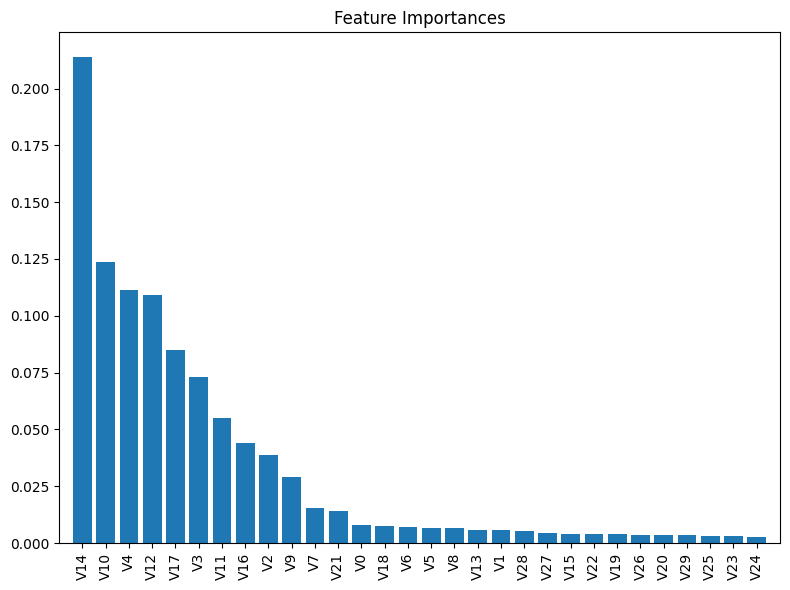

In [ ]:
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_final.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_final.shape[1]), ['V'+ str(i) for i in indices], rotation=90)
plt.xlim([-1, X_train_final.shape[1]])
plt.tight_layout()
plt.show()
plt.show()

# Modelo XGBoost

In [ ]:
model_xgb=XGBClassifier( n_estimators=100, random_state=42, learning_rate= 0.1)
history_xgb=model_xgb.fit(X_train_final, y_train_final)

In [ ]:
y_pred_train_xgb=model_xgb.predict(X_train_final)
y_pred_val_xgb=model_xgb.predict(X_val)


In [ ]:
matriz_confusion_xgb=confusion_matrix(y_val,y_pred_val_xgb)
print(matriz_confusion_xgb)

[[29830    23]
 [   10 29843]]


In [ ]:
print('\n Precision del clasificador para datos de test:')
print(classification_report(y_val, y_pred_val_xgb))
print('\n Precision del clasificador para datos de entrenamiento:')
print(classification_report(y_train_final,y_pred_train_xgb))


 Precision del clasificador para datos de test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29853
           1       1.00      1.00      1.00     29853

    accuracy                           1.00     59706
   macro avg       1.00      1.00      1.00     59706
weighted avg       1.00      1.00      1.00     59706


 Precision del clasificador para datos de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169167
           1       1.00      1.00      1.00    169167

    accuracy                           1.00    338334
   macro avg       1.00      1.00      1.00    338334
weighted avg       1.00      1.00      1.00    338334



# LOGISTIC REGRESION


In [ ]:
model_lr=LogisticRegression(random_state=42)
history_lr=model_lr.fit(X_train_final, y_train_final)

In [ ]:
y_pred_train_lr=model_lr.predict(X_train_final)
y_pred_val_lr=model_lr.predict(X_val)

In [ ]:
matriz_confusion_lr=confusion_matrix(y_val,y_pred_val_lr)
print(matriz_confusion_lr)

[[29588   265]
 [  858 28995]]


In [ ]:
y_train.shape
y_pred_train_lr.shape

(338334,)

In [ ]:
print('\n Precision del clasificador para datos de test:')
print(classification_report(y_val, y_pred_val_lr))
print('\n Precision del clasificador para datos de entrenamiento:')
print(classification_report(y_train_final, y_pred_train_lr))


 Precision del clasificador para datos de test:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29853
           1       0.99      0.97      0.98     29853

    accuracy                           0.98     59706
   macro avg       0.98      0.98      0.98     59706
weighted avg       0.98      0.98      0.98     59706


 Precision del clasificador para datos de entrenamiento:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    169167
           1       0.99      0.97      0.98    169167

    accuracy                           0.98    338334
   macro avg       0.98      0.98      0.98    338334
weighted avg       0.98      0.98      0.98    338334



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Crear una función para imprimir las métricas
def print_metrics(y_true, y_pred, model_name):
    print(f"\nEvaluación del modelo: {model_name}")
    print("Exactitud:", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_pred))

# Evaluar cada modelo
print_metrics(y_val, y_pred_val_lr, "Regresión Logística")
print_metrics(y_val, y_pred_rf, "Random Forest")
print_metrics(y_val, y_pred_val_xgb, "XGBoost")


Evaluación del modelo: Regresión Logística
Exactitud: 0.98119117006666
Precisión: 0.9909432672590567
Recall: 0.97125916993267
F1-Score: 0.981002486762641
AUC-ROC: 0.9811911700666599

Evaluación del modelo: Random Forest
Exactitud: 0.9999497537935886
Precisión: 0.9998995176848875
Recall: 1.0
F1-Score: 0.999949756318143
AUC-ROC: 0.9999497537935885

Evaluación del modelo: XGBoost
Exactitud: 0.9994472917294744
Precisión: 0.999229893524409
Recall: 0.9996650252905905
F1-Score: 0.9994474120464174
AUC-ROC: 0.9994472917294744


In [ ]:

# Función para trazar la curva ROC
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (Área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

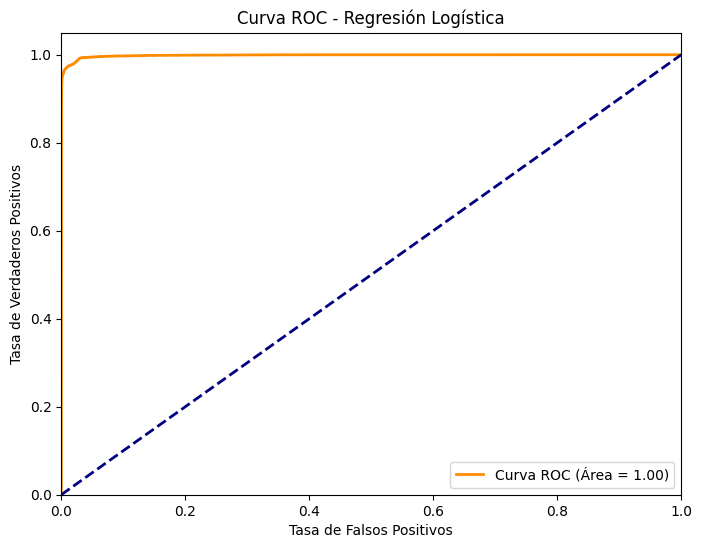

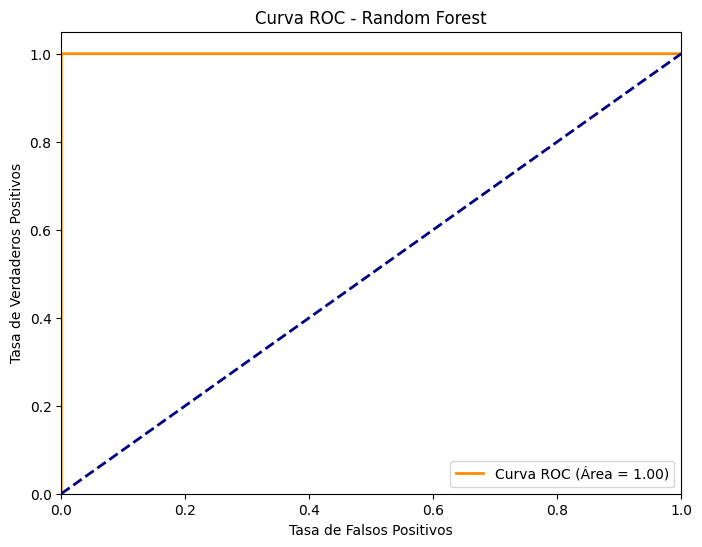

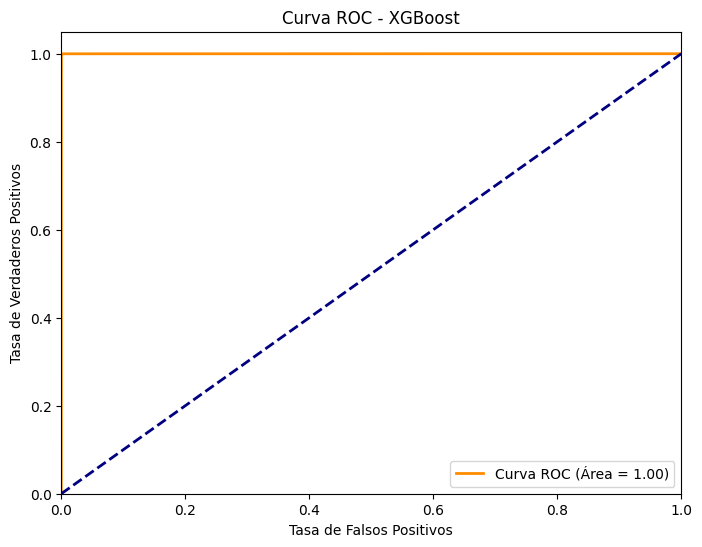

In [ ]:
   # Obtener probabilidades de predicción para la clase 1 (fraudulenta)
y_pred_proba_log_reg = model_lr.predict_proba(X_val)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]
y_pred_proba_xgb = model_xgb.predict_proba(X_val)[:, 1]

# Trazar la curva ROC para cada modelo
plot_roc_curve(y_val, y_pred_proba_log_reg, "Regresión Logística")
plot_roc_curve(y_val, y_pred_proba_rf, "Random Forest")
plot_roc_curve(y_val, y_pred_proba_xgb, "XGBoost")

In [ ]:
y_pred_test = rf_model.predict(X_test_scaled)

# Evaluar el rendimiento en el conjunto de prueba
print_metrics(y_test, y_pred_test, "Random Forest - Conjunto de Prueba")


Evaluación del modelo: Random Forest - Conjunto de Prueba
Exactitud: 0.9993562960102056
Precisión: 0.8297872340425532
Recall: 0.7905405405405406
F1-Score: 0.8096885813148789
AUC-ROC: 0.895129582070493


# Optimizacion y busqueda de hiperparametros

**GridSearchCV y RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# parametros_rf={
#     'n_estimators': [100, 200,300],
#     'max_depth': [10,20,40,50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
# rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# random_rf = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=parametros_rf,
#     n_iter=10,
#     cv=5,
#     verbose=2,
#     random_state=42)


# random_rf.fit(X_train_final, y_train_final)
# print("Mejores hiperparámetros para Random Forest:", random_rf.best_params_)

In [ ]:
# grid_search_rf = GridSearchCV(estimator=rf_model,
#                               param_grid=parametros_rf,
#                               cv=3,
#                               verbose=2,
#                               n_jobs=-1)
# grid_search_rf.fit(X_train_final, y_train_final)
# print("Mejores hiperparámetros para Random Forest:", grid_search_rf.best_params_)

In [ ]:
parametros_xgb={
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma':[0,3,5],
    'min_child_weight': [1, 3, 5]
}
xgb_model = XGBClassifier(random_state=42)

In [ ]:

random_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=parametros_xgb,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42)
random_xgb.fit(X_train_final, y_train_final)
print("Mejores hiperparámetros para XGBoost:", random_xgb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time=  11.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time=  13.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time=  11.4s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.8; total time=  22.0s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=10,

In [ ]:
best_rf_model=random_rf.best_estimator_
best_xgb_model=random_xgb.best_estimator_

y_pred_best_rf=best_rf_model.predict(X_test_scaled)
y_pred_best_xgb=best_xgb_model.predict(X_test_scaled)

print_metrics(y_test, y_pred_best_rf, "Random Forest - Conjunto de Prueba")
print_metrics(y_test, y_pred_best_xgb, "XGBoost - Conjunto de Prueba")

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss="log", random_state=42) #  modelo de aprendizaje en línea basado en stochastic gradient descens

# Entrenar el modelo en modo de aprendizaje incremental
for batch in range(0, len(X_train_final), 1000):  # Asumiendo que procesamos por lotes
    X_batch = X_train_final[batch:batch + 1000]
    y_batch = y_train_final[batch:batch + 1000]
    sgd_model.partial_fit(X_batch, y_batch, classes=np.unique(y_train_final))

# Predecir en el conjunto de validación
y_pred_sgd = sgd_model.predict(X_val)
print_metrics(y_val, y_pred_sgd, "SGDClassifier (Aprendizaje en línea)")